In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical


In [2]:
# Encode sentiment labels
df=  pd.read_csv(r'C:\Users\rohit\OneDrive\Desktop\tweet sentiment analyser\sentiment140_cleaned.csv')
labels = df['sentiment'].values
# Drop rows where text or sentiment is missing
df = df.dropna(subset=['text', 'sentiment'])

# Ensure all text values are strings
df['text'] = df['text'].astype(str)

# Now get values
texts = df['text'].values
labels = df['sentiment'].values

le = LabelEncoder()
labels_encoded = le.fit_transform(labels)
num_classes = len(np.unique(labels_encoded))
y = to_categorical(labels_encoded, num_classes=num_classes)

# Tokenization
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

# Padding
maxlen = 80  # You can tune this
X = pad_sequences(sequences, maxlen=maxlen, padding='post')

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
from tensorflow.keras.layers import LayerNormalization
model = Sequential([
    Embedding(input_dim=10000, output_dim=256, input_length=maxlen),
    Bidirectional(LSTM(64, return_sequences=True)),
    Bidirectional(LSTM(32)),
    LayerNormalization(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_4 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_normalization_1           │ ?                      │   0 (unbuilt) │
│ (LayerNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6)
checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True)

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=15,
    batch_size=64,
    callbacks=[early_stop, reduce_lr, checkpoint]
)


n

Epoch 1/15
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.7759 - loss: 0.4660

20000/20000 ━━━━━━━━━━━━━━━━━━━━ 1351s 67ms/step - accuracy: 0.7759 - loss: 0.4660 - val_accuracy: 0.8230 - val_loss: 0.4085 - learning_rate: 0.0010
Epoch 2/15
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.8287 - loss: 0.3835

20000/20000 ━━━━━━━━━━━━━━━━━━━━ 1504s 75ms/step - accuracy: 0.8287 - loss: 0.3835 - val_accuracy: 0.8300 - val_loss: 0.3800 - learning_rate: 0.0010
Epoch 3/15
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 1823s 91ms/step - accuracy: 0.8409 - loss: 0.3601 - val_accuracy: 0.8311 - val_loss: 0.3828 - learning_rate: 0.0010
Epoch 4/15
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 1953s 98ms/step - accuracy: 0.8496 - loss: 0.3432 - val_accuracy: 0.8323 - val_loss: 0.3816 - learning_rate: 0.0010
Epoch 5/15
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.8625 - loss: 0.3155

20000/20000 ━━━━━━━━━━━━━━━━━━━━ 2130s 107ms/step - accuracy: 0.8625 - loss: 0.3155 - val_accuracy: 0.8316 - val_loss: 0.3793 - learning_rate: 5.0000e-04
Epoch 6/15
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 2017s 101ms/step - accuracy: 0.8730 - loss: 0.2935 - val_accuracy: 0.8297 - val_loss: 0.3831 - learning_rate: 5.0000e-04
Epoch 7/15
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 1933s 97ms/step - accuracy: 0.8817 - loss: 0.2748 - val_accuracy: 0.8260 - val_loss: 0.3969 - learning_rate: 5.0000e-04
Epoch 8/15
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 2667s 133ms/step - accuracy: 0.8946 - loss: 0.2477 - val_accuracy: 0.8243 - val_loss: 0.4218 - learning_rate: 2.5000e-04


In [13]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")


10000/10000 ━━━━━━━━━━━━━━━━━━━━ 277s 28ms/step - accuracy: 0.8303 - loss: 0.3798
Test Accuracy: 0.8316


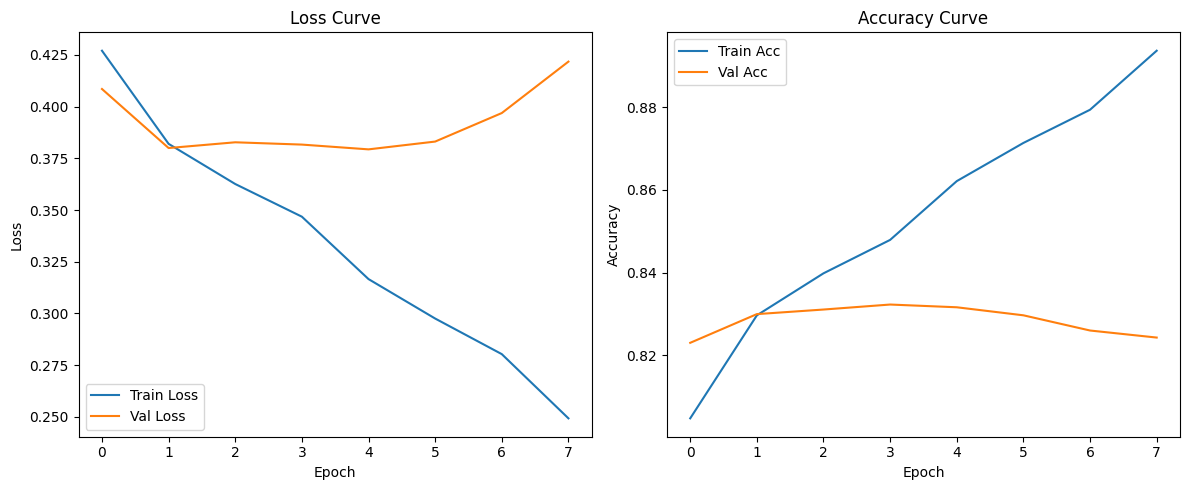

In [14]:
import matplotlib.pyplot as plt

# Plot Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy Curve')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


10000/10000 ━━━━━━━━━━━━━━━━━━━━ 234s 23ms/step


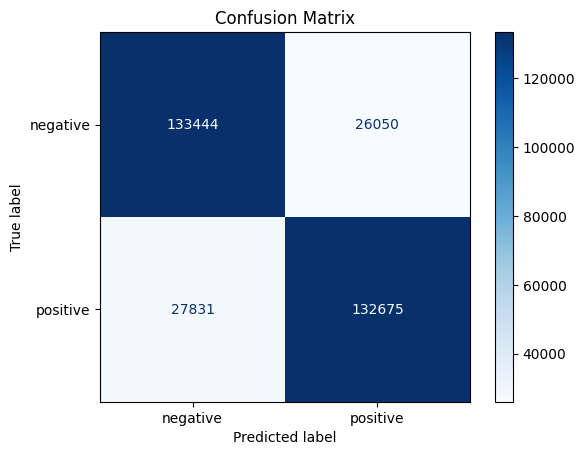

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Predict classes
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


In [16]:
model.save(r'C:\Users\rohit\OneDrive\Desktop\tweet_sentiment_lstm_model4.h5')
import pickle
with open(r"C:\Users\rohit\OneDrive\Desktop\tokenizer4.pkl",'wb')  as f:
    pickle.dump(tokenizer, f)
